# Digital Filtering
---

*This lab work will be evaluated based on a report you have to make and send as a single pdf file named **SP_TP4_NAME1_NAME2.pdf** to : pierre.boue@univ-grenoble-alpes.fr. A PDF can be directly produced from the notebook menu **File/Save and Export Notebook as/PDF**. This may require to install a specific package. But you are free to use any editor you want.*
*Your report has to be a synthetic and properly formatted document. If you directly export a notebook, please remove cells with questions, keeping only a well formatted answer sheet. Follow the same indexing (section and question number) as in this document. Questions have to be answered as detailed as possible with figures if necessary. The symbol $\square$ indicates that at least one figure is requested. Figures have to be clear and need captions and labels. Except if it is specifically requested (symbol $\blacksquare$), you do not have to reproduce codes and/or command lines in your report. We welcome any comments and feedbacks that can help improve this class!}*

In [2]:
import numpy as np
from scipy import signal as sp
from matplotlib import pyplot as plt
import TP04_sub
try:
    %matplotlib widget
except:pass

## 1. Introduction

In these exercises we introduce basic concepts of filtering.
Properties of a filter can be defined in the time domain or in the frequency domain.
The **impulse response** defines the filter in the time domain.
It defines how information in time domain is being modified by the (filter) system.
The DFT (or FFT) of that impulse response is then the equivalent **frequency response, a.k.a. transfer function** in the frequency domain.
It defines how information in the frequency domain is being changed (i.e. filtered!)
**It is not possible to optimize a filter for both applications.**

The time delay of a signal leads to a corresponding systematic change of the spectral phase properties: the linear trend used in method (2).

In the following sections you will use already written functions that you can call from `TP04_sub`. **YOUR** job is answer questions but also to understand what is written!

## 2. Moving average filter

One of the simplest filters is the **moving average filter** (MA filter).
In equation form it can be written

\begin{equation}
y_i = \frac{1}{N} \sum_{j=0}^{N-1} x_{i+j}
\end{equation}

Where $x$ is the input signal consisting of $I$ samples,
and $y$ is the filtered output signal, and $N$ denotes the number of points in the average.
For example, using a 5-point MA filter, 

the filtered point 10 in the output signal is :

\begin{equation}
 y_{10} = \frac{1}{5}\,\left(x_{10} + x_{11} + x_{12} + x_{13} + x_{14}\right).
\end{equation}

Alternatively, the group of points from the input signal can be chosen symmetrically (summing over $x_8$ to $x_{12}$) 
around the output point or `backwards' (summing over $x_6$ to $x_{10}$).

Comparison of previous equations with the previously introduced concept of convolution lets you recognize that the MA filter represents the convolution of an input signal with a boxcar (re-work previous practicals if you don't get that!).
The first exercise explores some basic properties of that operation and in particular its connection with a moving average/smoothing processing

To start, the cell below generates (from a ``signal_generator()``) a sin a sinusoidal signal with a one-year period (can be changed using different ``f0`` values). 
This can be the record of an annually changing variable, like temperature, or any other observable that is driven by the seasonal atmospheric weather pattern (e.g., the microseism particle motion observed near the coast).\\

A boxcar function can also be generated from the same subfunction. This boxcar can be either forward (``stype='boxcar_fwd'``), backward (``stype='boxcar_bwd'``) or centered (``stype='boxcar_ctd'``). The width of the boxcar is controlled by the argument ``N_bxc`` which is expressed in samples.

The function ``make_plts`` generates a series of 6 sublots that you can directly use for understand the effect of this filter:

- (a) Sinusoidal signal plus additive random noise.
- (b) Corresponding amplitude spectrum.
- (c) Boxcar function. 
- (d) Corresponding amplitude spectrum.
- (e) The result of the MA filter which is computed using (a) and (c). The target oscillation (noise-free) is also plotted in yellow.
- (f) Corresponding amplitude spectrum.

In the following exercises we assume a fixed number of cycles per year (i.e., 1) to make the connection to the seasonal variability. However, you can choose other values (0.5, 2, 4) if you find the resulting plots more eligible, more convincing or easy to interpret.

---------
QUESTIONS 


 1. Experiment a number of different ``N_bxc`` values between, say, 1 and 300 $\square$.
   - Describe the shape of the boxcar amplitude spectrum in subplot (d). What are the distinctive features? (remember from TP1...)
   
   Shape of the boxcar: <br>
The width of peak in the boxcar function depends on the value of the N_bxc value. <br>
Shape of amplitude spectrum of the boxcar function:<br>
Shape of a sinc function squared (?) as it is only on the positive amplitude axis. <br>
Width of the peaks depends on N_bxc value. <br>
The higher the N_bxc value, the smaller is the width of the peaks.

   
   
   
   
   
   - Compare the input (blue curve in (a)) and output (green line in (e)): Do they align? If not, in what sense do they not align? (See equation \ref{eq_sum} for details)
   
   The smaller the N_bxc value, the more alike are the two curves.<br>
   Given that we are using a moving average filter,<br>
   the smaller the size of the window, the more alike will be the input and output signals.<br>
   The function is able to detect small changes more easily and hence keeps even insignificant and rapid changes in the input in    the output.<br>
   The larger the window size, the less sensitive is the output to rapid changes.<br>
   As N_bxc increases, the output hence becomes smoother and insignificant changes are discarded.
   
   
   
   
   
   
   
   
   
   
   - The program prints a message to standard output that was generated using the correlation function introduced in TP2 for the delay measurement. How does this apply here? Is there a relation between $N_bxc$ and the printed value? (you may have to re-run the cell several times to average the effect of the random noise...)
   
   In TP2, we used the correlation function to calculate the time delay between signals.<br>
   From the printed data, we see that as we increase N_bx, the delay in sample between the two signals increases. <br>
   Varying the N_bx value, varies the smoothness of the output signal. <br>
   Given that the time between which the input and output signal aligns increases when the N_bx value increases, the printed value hence increases.

sampling rate = 1 day
delay in sample between the two signals in (e):0.0


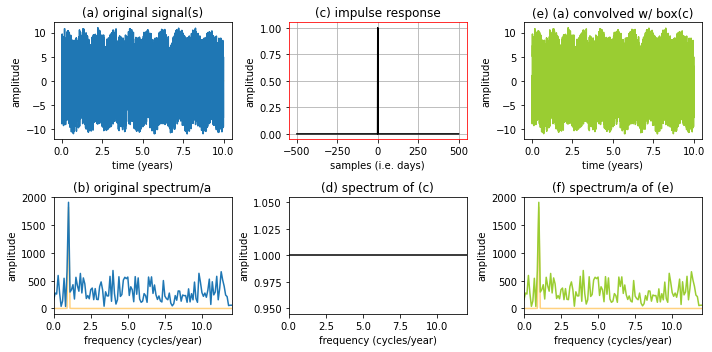

In [3]:
# initial signal
signal_length = int(10*365.25) #10 years with a day as sampling rate...
f0            = 1/365.25       #fundamental frequency of the "master" signal .. a year
s       = TP04_sub.signal_generator(stype='sin',f0=f0,slen=signal_length,noise_lvl=0) # original (target) signal
s_noisy = TP04_sub.signal_generator(stype='sin',f0=f0,slen=signal_length,noise_lvl=20) # noisy one (i.e. our measure...)

# boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=1) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 
# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

sampling rate = 1 day
delay in sample between the two signals in (e):23.0


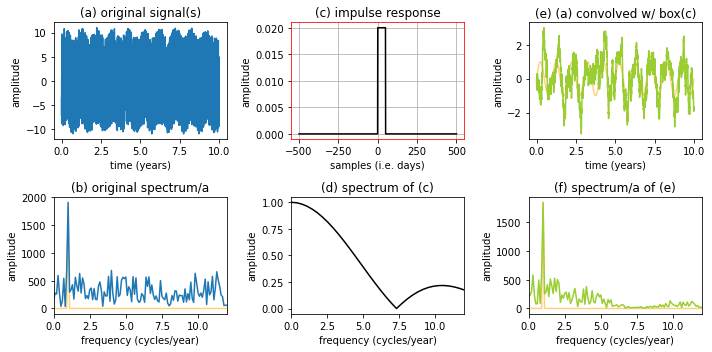

In [4]:
# boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=50) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 

# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

sampling rate = 1 day
delay in sample between the two signals in (e):47.0


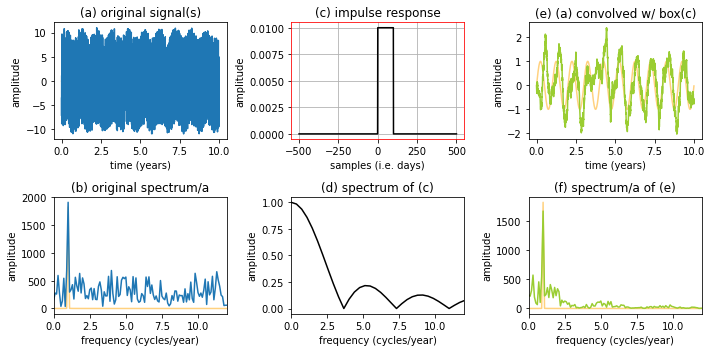

In [5]:
# boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=100) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 

# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

sampling rate = 1 day
delay in sample between the two signals in (e):72.0


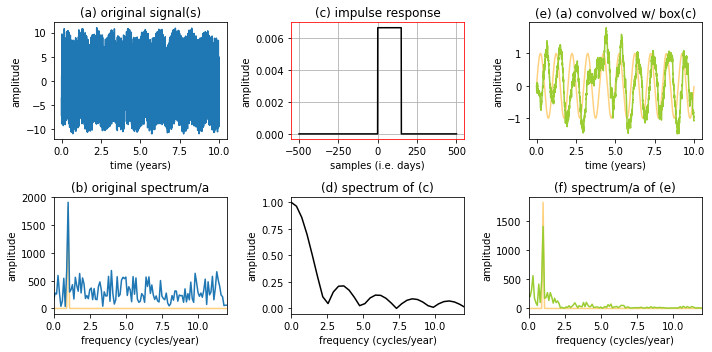

In [6]:
# boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=150) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 

# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

sampling rate = 1 day
delay in sample between the two signals in (e):96.0


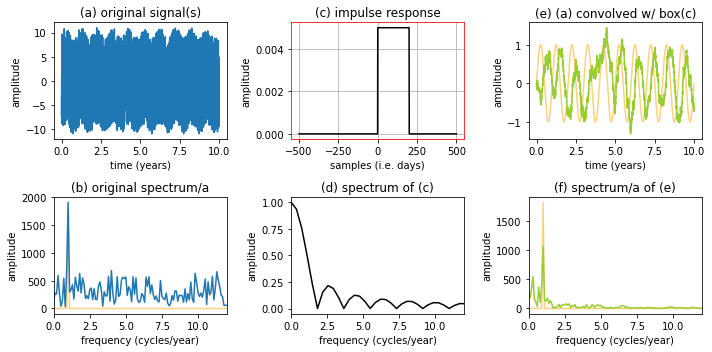

In [7]:
# boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=200) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 

# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

sampling rate = 1 day
delay in sample between the two signals in (e):120.0


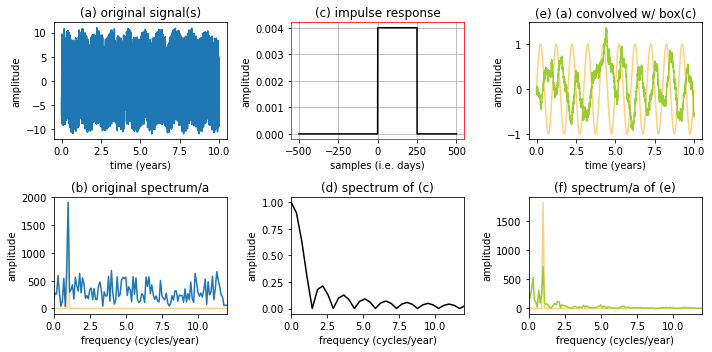

In [8]:
##### boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=250) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 

# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

sampling rate = 1 day
delay in sample between the two signals in (e):-225.0


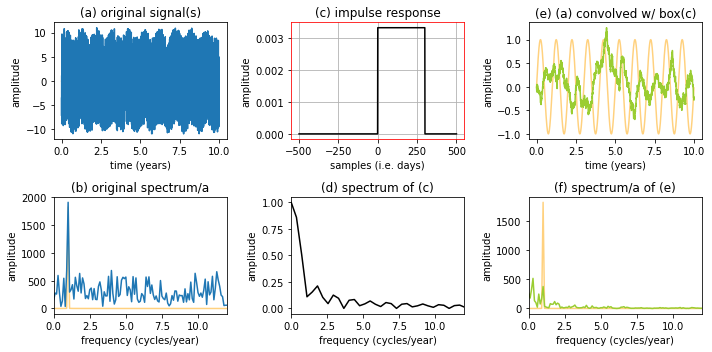

In [9]:
##### boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=300) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 

# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

 2. For a fixed ``N_bxc`` (say, 100 or 200), explore the effect of different noise amplitudes ``noise_lvl`` on s_noisy ($\square$).
   - Comment on the effect of the noise level in frequency amplitude spectrum (b) in relation to visibility of sine-function (a).<br>
   
       As noise level increases, the visibility of the sine-function (a) decreases.<br>
       The frequency amplitude spectrum(b) becomes more noise and has much more peaks.<br>
       This makes it more difficult to distinguish between the original signal and the noise, making the sinusodial graph of the original signal less visible.
   

- Comment on the information you can read off plots (e) and (f) depending on the noise level.
   - Explain the differences in the filtered amplitude spectrum (f) compared to the original spectrum (b) considering spectrum (d).
   
    
       The MA filter smoothes out the original spectrum in b). It removes the insignificant noise in the original spectrum.
       This results in a spectrum (f) with a narrower central peak and luch less insignificant peaks. 
       Those insignificant peaks have been filtered out during the averaging done by the filter.
                                                                                                                               
   

3. Dive into the subfunction ``TP04_sub.make_plts()`` and try to find the line where the filter is actually applied to the input signal. What (built-in) function is called?
        signal_filt = np.convolve(box,s,mode='same')   
        The signal is filtered by convolving the original signal with the box function.<br>
        It is equivalent to computing the sliding average according to a given N_bxc value.

4. Recall the initial statement: It is not possible to optimize a filter for both applications. Do you think the MA filter is performing well in the time or in the frequency domain? In other words, do you think a simple MA is a good way to filter a range of frequencies? Is it selective in the frequency domain?

       The MA filter performs well in the time domain. In e), we see that it conserves the sinusodial shape of the original signal.
       It filters out the unnecessary noise along the time domain.
       The MA filter does not perform as well in the frequency domain. Aside from the central peak, we can see that the original signal loses most of its characteristics.
       While the filter does smooth out the signal, it allows for too much significant loss of data.

In [10]:
# initial signal
signal_length = int(10*365.25) #10 years with a day as sampling rate...
f0            = 1/365.25       #fundamental frequency of the "master" signal .. a year
s       = TP04_sub.signal_generator(stype='sin',f0=f0,slen=signal_length,noise_lvl=0) # original (target) signal


sampling rate = 1 day
delay in sample between the two signals in (e):147.0


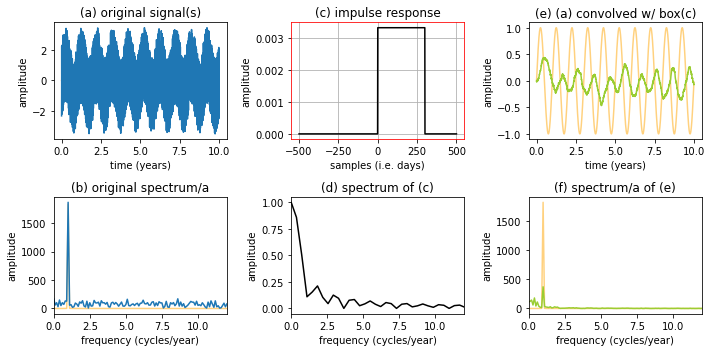

In [11]:
s_noisy = TP04_sub.signal_generator(stype='sin',f0=f0,slen=signal_length,noise_lvl=5) # noisy one (i.e. our measure...)

# boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=300) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 

# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

sampling rate = 1 day
delay in sample between the two signals in (e):145.0


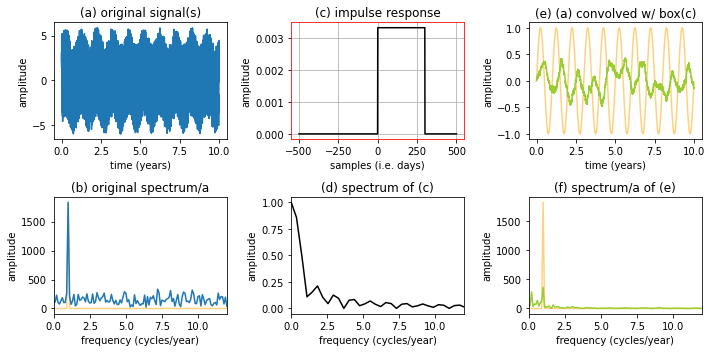

In [12]:
s_noisy = TP04_sub.signal_generator(stype='sin',f0=f0,slen=signal_length,noise_lvl=10) # noisy one (i.e. our measure...)

# boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=300) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 

# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

sampling rate = 1 day
delay in sample between the two signals in (e):144.0


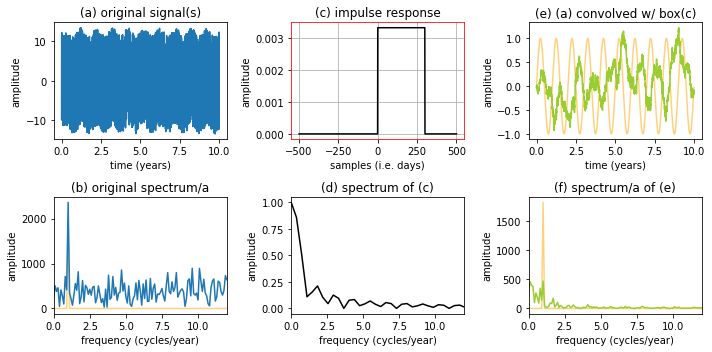

In [13]:
s_noisy = TP04_sub.signal_generator(stype='sin',f0=f0,slen=signal_length,noise_lvl=25) # noisy one (i.e. our measure...)

# boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=300) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 

# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

sampling rate = 1 day
delay in sample between the two signals in (e):147.0


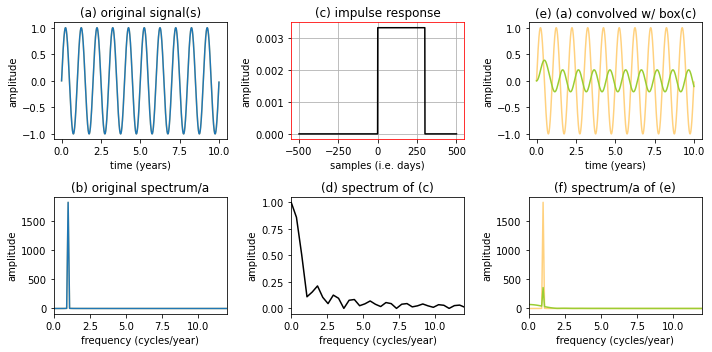

In [14]:
s_noisy = TP04_sub.signal_generator(stype='sin',f0=f0,slen=signal_length,noise_lvl=0) # noisy one (i.e. our measure...)

# boxcar (impulse response)
box = TP04_sub.signal_generator(stype='boxcar_fwd',slen=1001,N_bxc=300) # boxcar corresponding to our MA impulse response
box = box/np.sum(box) # necessary normalisation to account for an Averaging and not a simple stack 

# plots
plt.close()
TP04_sub.make_plts(s_noisy,s,box,print_delay=True,exo=1)

## 3. Low Pass, High Pass, Band Pass

We here consider common filter types that are **implemented in the frequency domain**:
*low pass*, *band pass*, and *high pass* filters (we neglect *band and notch reject* filters).
These filters are characterized by the
pass band (frequencies that are passed) and the stop band (blocked frequencies). In between is the transition band. 
Note that sharp edges like in the boxcar example are painstakingly avoided because a $\delta$-step leads to an infinitely long equivalent response in the time domain (this will be illustrated in a second...). A lot of work is dedicated to find optimal behavior in the transition band, to optimize the so-call roll-off (i.e. how to be selective with without introducing distortion in the pass band ...) of filters. This is to avoid artifacts to be introduced into the time-domain signal (topic of section \ref{sec_recursive}).

To start with this idea we will create boxcar windows that we will progressively smoothed, thus, making a better impulse response. Note that standard windows such as Butterworth or Chebyshev are often used for real applications. This is because these windows were optimized for specific applications (see the last part of this practical for details)

For the following questions, we will use exactly the same subfunctions as for the MA filter. The window is simply now define in the frequency domain (panel (d)) rather than in the time domain (panel (c)). We (on purpose) show both the positive and negative frequencies for this section to highlight the need to implement the "mask" on both sides. We will illustrate the effect of the different windows on a ``chirp`` (a.k.a ``sweep``) signal: a oscillating signal for which the frequency decrease linearly. The window used for filtering is also generated with ``TP04_sub.signal_generator`` using either ``stype='bp'``, ``stype='lp'``, ``stype='bp'``.

When defining filtering window ``box_FD``, we also have to pass a new argument `fc` which define the cutt-off frequency/ies. In analog filters it is the frequency at which amplitude reduced to $-3$~dB or to 0.707 (a proxy for spotting the transition band). For digital filters this appears less standardized, but the idea is similar.

1. Run the cell below. By default, it applies a low pass filter to the initial chirp signal.
- Try different value for ``fc`` ranging from 0 to 0.5Hz, $\square$.
- Comment on the output signal (Green line, panel (e)) <br>
      
      Smoother with smaller values of fc.
        
- Looking at the impulse response (panel (c)) and the text above, explain why it is considered as a "bad" way to filter

        Above it is mentionned that:
        """Note that sharp edges like in the boxcar example are painstakingly avoided because a  𝛿-step leads to an infinitely long equivalent response in the time domain """
        In panel (c), we can see that the filter function does have a sharp edge. This may cause distortions in the output signal.
    
2. Using a Gaussian function, which you can generate using scipy subfunctions (``sp.gaussian(...)``), modify ``box_FD`` to make it smoother $\square$. Can you see a relation between this simple operation and the entire practical? (if yes, it's good, otherwise, stay focus ;))

        This operation is better for smoothing out the signal in the frequency domain as compared to the filter used in the previous part.
        
        This operation aids in the problem encountered with filters with sharp edges. This allows for there to be minimal ripples in the time and frequency domains due to the sharp edges.

3. Modifying the width of the Gaussian, you should be able to manually reduce the unwanted effects produced by a too sharp (i.e. selective) filter (e.g. boxcar transfer function). Comment on the effect of this modification on panel (c), (e) and (f).
        
        Panel (c):
        Increasing the width of the Gaussian removes more of the ripples in the time domain. 
        We can see that using a standard of deviation of 10, we can still see ripples in the time domain in (c) but using a higher standard deviation of 30, there are barely any ripples in the impulse response time domain.

        Panel (e): 
        A smaller width (here std deviation 5) causes abrupt changes in the graph as compared to a larger width of the gaussian function (here std deviation 30). 
        In the e) with a larger std deviation, the filtered signal is comparatively less distorted.
        
        Panel (f):
        The frequency domain of the filtered signal is sharper with a gaussian of smaller width.
        It filters out more frequencies beyond the passband and hence gives a steeper output.
        With a larger width, the frequency domain of filtered is smoother, i.e it discards frequencies beyond the passband in a more 'careful' way such that in the graph we see a more gradual attenuation of frequencies.
        
4. Re-run the cell but now for both high pass and band pass filters. Verify using both panel (e) and (f) that they perform according to their name... Notice the shape of the impulse response. Can you make a connection to the moving average exercise? Which filter (lp, hp, bp) could correspond to the MA implementation in section 2? What characteristics do you consider?

5. Recall the initial statement : It is not possible to optimize a filter for both applications. What is/are the possible drawback(s) of this implementation?

PLOT WITH fc VALUE: 0
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.1
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.2
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.3
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.4
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.5
sampling rate = 1/10 sec


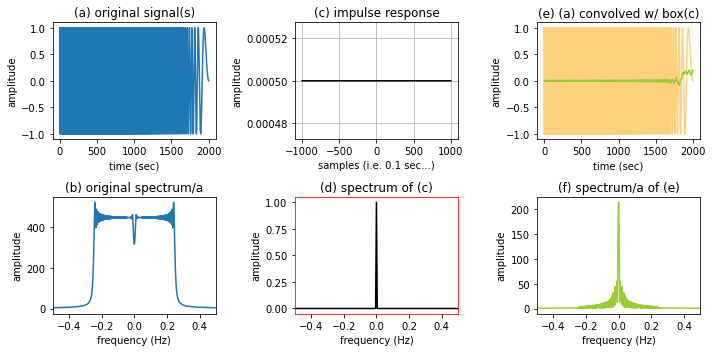

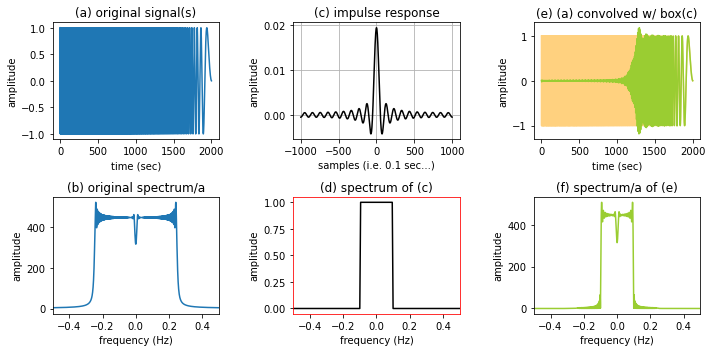

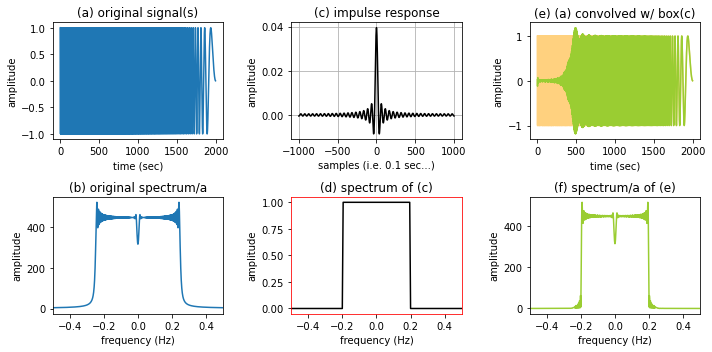

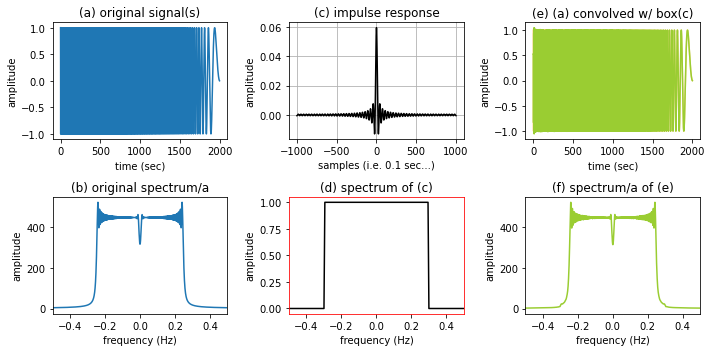

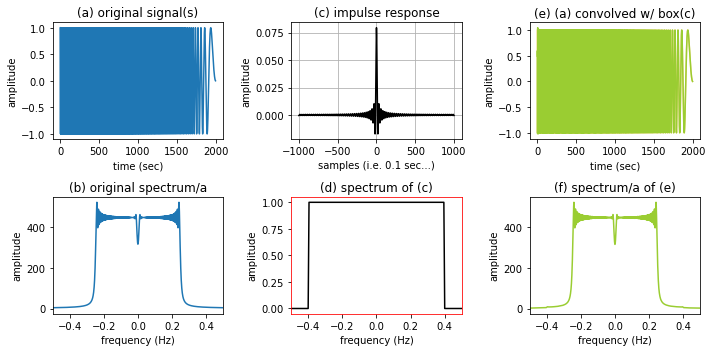

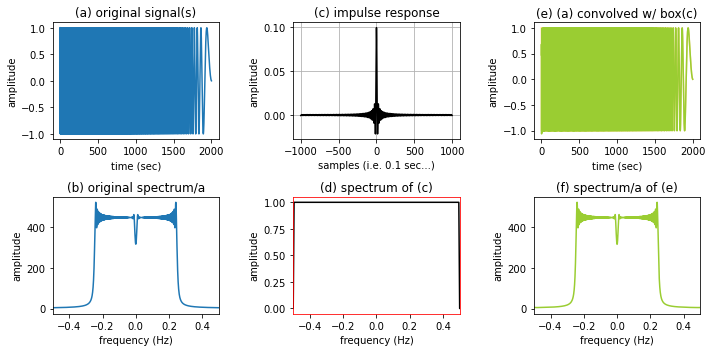

In [15]:
# initial signal
signal_length = 20000 # length of the initial signal
f0            = 1/40   #initial (highest) freq for the chirp
s             = TP04_sub.signal_generator(stype='chirp',f0=f0,slen=signal_length,noise_lvl=0)


fc_arr=[0,0.1,0.2,0.3,0.4,0.5]
# box (transfer function)
for val in fc_arr:
#fc    = 0.1 # cuttoff frequency/ies in Hz, SHOULD BE A LIST OF TWO VALUES FOR BANDPASS, e.g. [0.1,0.2]
    stype = 'lp' # filter type: 'lp, 'bp', 'hp'
    box_FD = TP04_sub.signal_generator(stype=stype,slen=int(signal_length/10),fc=val,fs=10.) # boxcar corresponding to our MA impulse response
#gauss  = create your gaussian here 
#box_FD = apply a smart smoothing :)
    box_FD = box_FD/np.max(box_FD) # necessary normalisation to account for an Averaging and not a simple stack  

# plots
    print("PLOT WITH fc VALUE:",val)
    TP04_sub.make_plts(s,box_FD=box_FD,exo=2)


PLOT WITH fc VALUE: 0
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.1
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.2
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.3
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.4
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.5
sampling rate = 1/10 sec


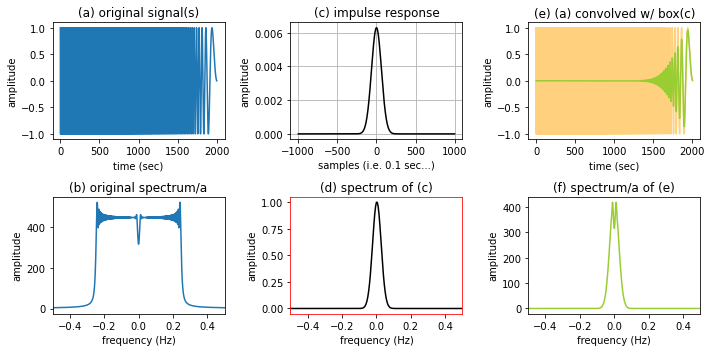

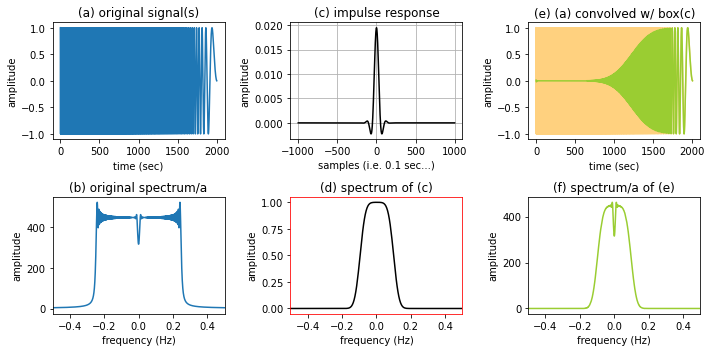

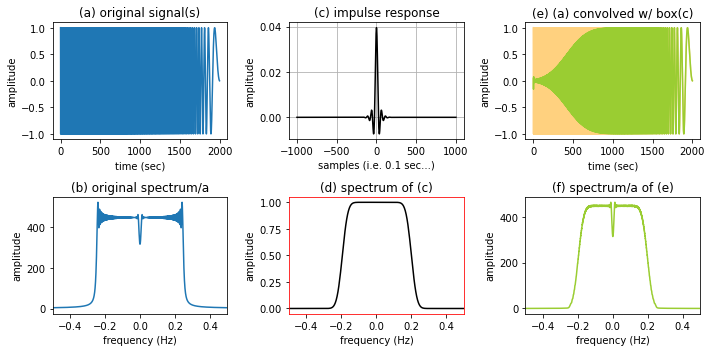

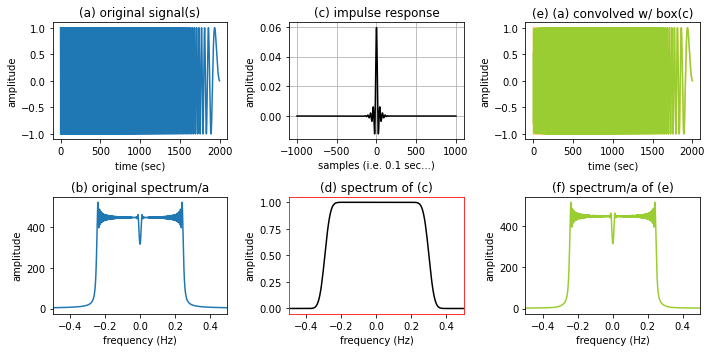

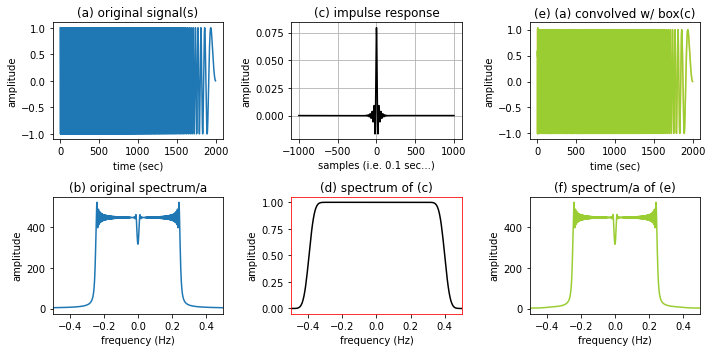

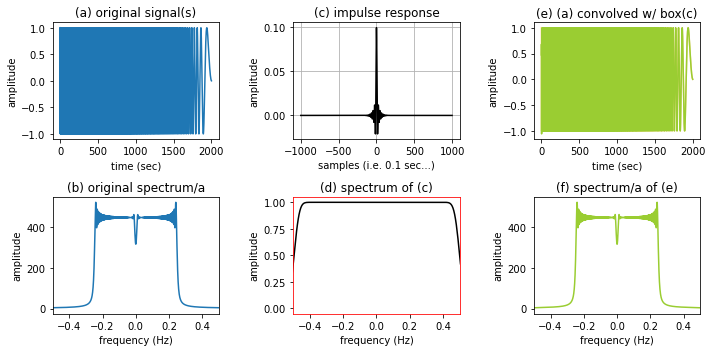

In [16]:
#Using Gaussian function
# initial signal
signal_length = 20000 # length of the initial signal
f0            = 1/40   #initial (highest) freq for the chirp
s             = TP04_sub.signal_generator(stype='chirp',f0=f0,slen=signal_length,noise_lvl=0)


fc_arr=[0,0.1,0.2,0.3,0.4,0.5]
# box (transfer function)
for val in fc_arr:
#fc    = 0.1 # cuttoff frequency/ies in Hz, SHOULD BE A LIST OF TWO VALUES FOR BANDPASS, e.g. [0.1,0.2]
    stype = 'lp' # filter type: 'lp, 'bp', 'hp'
    box_FD = TP04_sub.signal_generator(stype=stype,slen=int(signal_length/10),fc=val,fs=10.) # boxcar corresponding to our MA impulse response
    window_length = len(box_FD)
    standard_deviation=5
    gauss  = sp.gaussian(window_length,standard_deviation)
#box_FD = apply a smart smoothing :)
    box_FD = sp.convolve(box_FD, gauss, mode='same')

    box_FD = box_FD/np.max(box_FD) # necessary normalisation to account for an Averaging and not a simple stack  

# plots
    print("PLOT WITH fc VALUE:",val)
    TP04_sub.make_plts(s,box_FD=box_FD,exo=2)

PLOT WITH fc VALUE: 0
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.1
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.2
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.3
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.4
sampling rate = 1/10 sec
PLOT WITH fc VALUE: 0.5
sampling rate = 1/10 sec


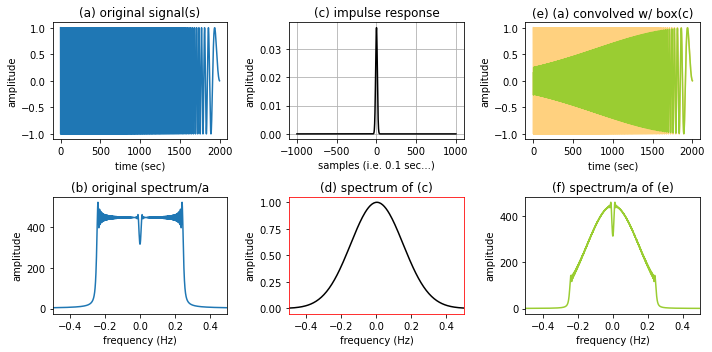

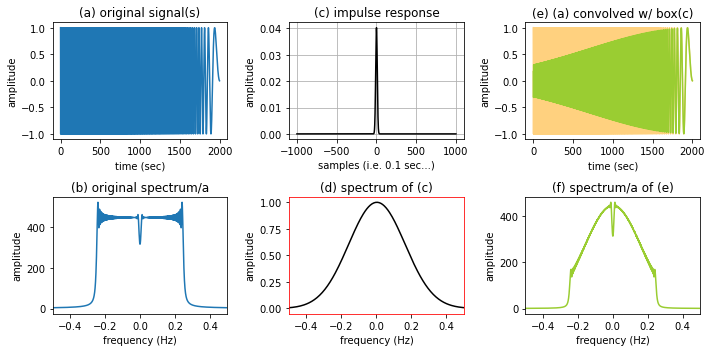

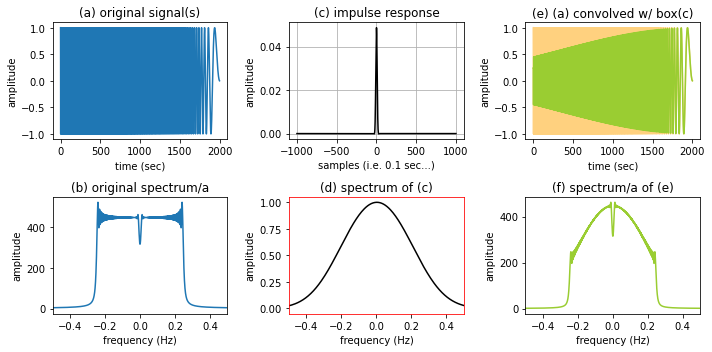

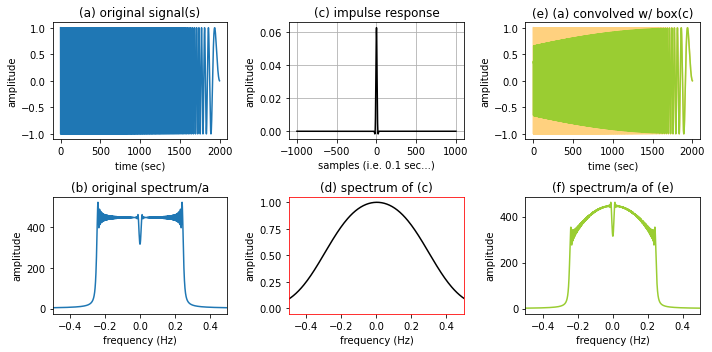

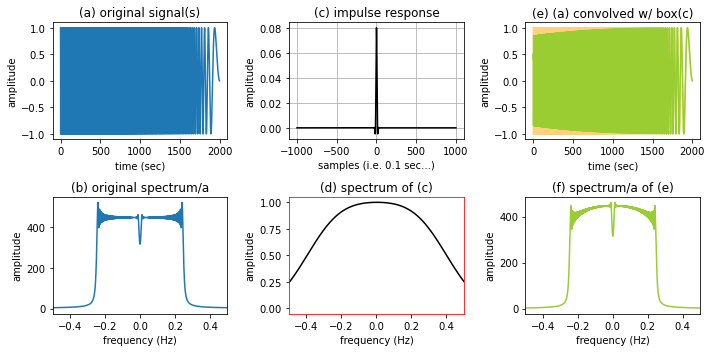

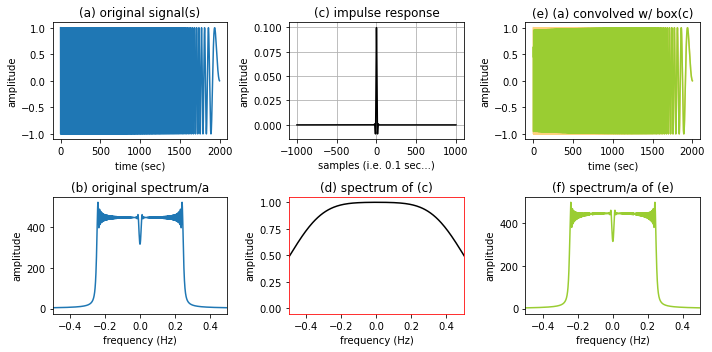

In [17]:
#Modifying the width of the Gaussian function
#Modifying the standard deviation value
signal_length = 20000 # length of the initial signal
f0            = 1/40   #initial (highest) freq for the chirp
s             = TP04_sub.signal_generator(stype='chirp',f0=f0,slen=signal_length,noise_lvl=0)


fc_arr=[0,0.1,0.2,0.3,0.4,0.5]
# box (transfer function)
for val in fc_arr:
    stype = 'lp' # filter type: 'lp, 'bp', 'hp'
    box_FD = TP04_sub.signal_generator(stype=stype,slen=int(signal_length/10),fc=val,fs=10.) # boxcar corresponding to our MA impulse response
    window_length = len(box_FD)
    standard_deviation=30
    gauss  = sp.gaussian(window_length,standard_deviation)
#box_FD = apply a smart smoothing :)
    box_FD = sp.convolve(box_FD, gauss, mode='same')

    box_FD = box_FD/np.max(box_FD) # necessary normalisation to account for an Averaging and not a simple stack  

# plots
    print("PLOT WITH fc VALUE:",val)
    TP04_sub.make_plts(s,box_FD=box_FD,exo=2)

PLOT WITH fc VALUE: 0.1
sampling rate = 1/10 sec


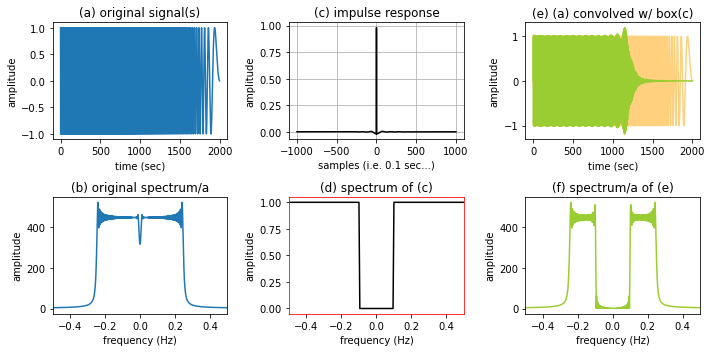

In [18]:
# initial signal
signal_length = 20000 # length of the initial signal
f0            = 1/40   #initial (highest) freq for the chirp
s             = TP04_sub.signal_generator(stype='chirp',f0=f0,slen=signal_length,noise_lvl=0)


# box (transfer function)
fc    = 0.1 # cuttoff frequency/ies in Hz, SHOULD BE A LIST OF TWO VALUES FOR BANDPASS, e.g. [0.1,0.2]
stype = 'hp' # filter type: 'lp, 'bp', 'hp'
box_FD = TP04_sub.signal_generator(stype=stype,slen=int(signal_length/10),fc=0.1,fs=10.) # boxcar corresponding to our MA impulse response
standard_deviation=30
gauss  = sp.gaussian(window_length,standard_deviation)
box_FD = box_FD/np.max(box_FD) # necessary normalisation to account for an Averaging and not a simple stack  

# plots
print("PLOT WITH fc VALUE:",fc)
TP04_sub.make_plts(s,box_FD=box_FD,exo=2)


## 3. Your recursive filter

The optimal filter in the frequency domain would consist of a step function (Heaviside or Boxcar). As you know, the time-domain equivalence is an infinitely long attenuating sinc-function (never reaches zero). A useful practical alternative is a windowed sinc: A sinc-function mulitplied with some taper. This has an incredibly good performance in terms of stop band attenuation, and an acceptable roll-off. The problem is its execution time because the filter kernel may be long, perhaps prohibiting long if standard convolution is used. Still, it works for many applications, and it can be tuned to the problem at hand (this is exactly what you did a moment ago in section 3). Everything else is about performance "only" (which can be a game changer for some applications...). Convolution also does not work if a filter should work on a live feed data.

Recursive methods or **recursive filters** constitute an efficient way of achieving a long impulse response (again, in f-domain: sharp corner) without having to perform a long convolution. Recursive filters are Infinite Impulse Response (**IIR**) filters (never zero, decaying exponentials). In contrast, digital convolution filters are Finite Impulse Response (**FIR**) filters.

Consider this equation to estimate the current ($n$) output sample $y_n$ from the current and previous samples of the input signal $x$:
\begin{equation}
 y_{n} = a_0x_{n} + a_1x_{n-1} + a_2x_{n-2} + a_3x_{n-3} + \ldots
\end{equation}

Comparison with equation in the MA filter section shows that this is, again, the implementation of the convolution, where the coefficients $a_i$ form the convolution kernel. This would correspond to a FIR filter (not recursive).

A recursive filter is obtained when previously calculated values of the output signal $y_{n-1}$, $y_{n-2}$, $\dots$ are used to compute the current value $ y_{n}$ (feedback). Hence, we can form a more general formulation

\begin{equation}
 y_{n} = a_0x_{n} + a_1x_{n-1} + a_2x_{n-2} + a_3x_{n-3} + \ldots + b_1y_{n-1} + b_2y_{n-2} + b_3y_{n-3} + \ldots 
\end{equation}
%
(There is no $b_0$ because this corresponds to the current sample being calculated.)
The above equation is the **recursion equation**, and the $a$ and $b$ values are called **recursion coefficients**.
In practice, not more than a dozen coefficients can be used in a filter, or it becomes unstable (i.e., the output increases or oscillates).

As said, such recursive filters are useful because they bypass a longer convolution.
In effect, recursive filters convolve the input signal with a very long filter kernel (found---by definition---by passing a delta function through the system), although only a few coefficients are involved!
The relationship between the recursion coefficients and the filter's response is given by a mathematical technique called the **z-transform**, which is briefly explained below.


1. The cell below will run your own implementation of a (very simple) recursive low pass filter. By default, a boxcar function will be used as an initial signal. Only two coefficients are use for this filter: $a_0$ and $b_1$. $b_1$, which can be modified (it must be bound between 0 and 1), is used to define $a_0$. `npass` is another variable that can be either 1 or 2, which will be use later.

However, the cell will not work until you code the missing lines in ``TP04_sub.myrecursive(...)``.
 
 - Implement the recursive filter function $\blacksquare$.
 - Why do the loop within ``TP04_sub.myrecursive(...)`` starts at iteration 2 (index 1 in python...)?
        
       So that we can access signalfilt[i-1] when i-1 needs to be 0 in line signalfilt[i]= a0*signal[i]+b1*signalfilt[i-1].
       Otherwise we would get an index out of range error if we started the loop from index 0 as index -1 does not exist
 
 - Starting with ``npass=1``, what is the effect on the filtered signal?
     
       From the graph, we can see that there is a phase delay in the filtered signal. It is however much smoother than the sharp edges of the original signal.
 - Can you argument in terms of the phase/delay?
       
 - Remember that we are trying to implement a low pass. What does the filter frequency response look like, good or bad? Try different value for ``b0``.
 - Based on the ``TP04_sub.my_recursive_filter(...)``, describe what ``npass=2`` does.
         
        The filter passes through the input signal two times:One time it does the forward pass as when npass=1 and then it does a backward pass through the filtered signal again.
           This allows the function to take into consideration the phase delay introduced in the signal during the forward pass.
         From the output that we get when using npass=2 and calling the function my_recursive_filter, the output signal is smoother and does not have the phase shift seen when just one pass of the filter is done.
 
 - What is the difference in amplitude (and phase) compared to the ``npass=1``?
 
         No change in amplitude and no phase shift as compared to npass=1.
         The second pass deals with the phase shift introduced in the first pass.
 - What should be the input signal (instead of a boxcar) to evaluate the impulse response of such a filter?
         
         A dirac delta function would be more appropriate as an input signal.
         Given that the delta signal has amplitude 1 at only one point in time, 
         we can better observe the effect of the filter at only that specific point in time.
         

**Important note**: `npass=1` is known as a **causal filter** and `npass=2` is a so-called **zero-phase filter**. Causal filters are very useful in seismology for picking the arrival time of seismic phase as you may understand from the previous exercise.

sampling rate = 1/10 sec


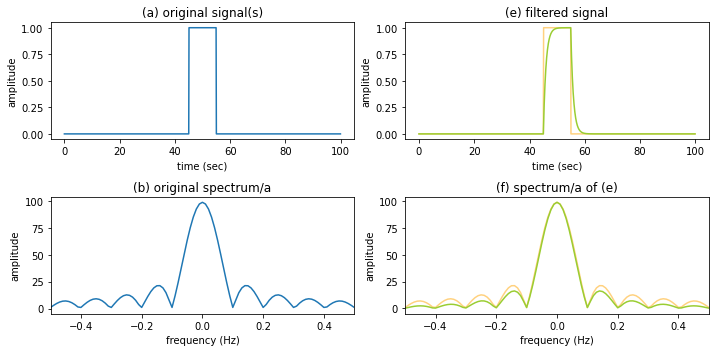

In [19]:
s = TP04_sub.signal_generator(stype='boxcar_ctd',N_bxc=100,slen=1000)

b1 = 0.90 # between 0 and 1

plt.close()
TP04_sub.make_plts_recursion(s,a0=1-b1,b1=b1,npass=1)

sampling rate = 1/10 sec


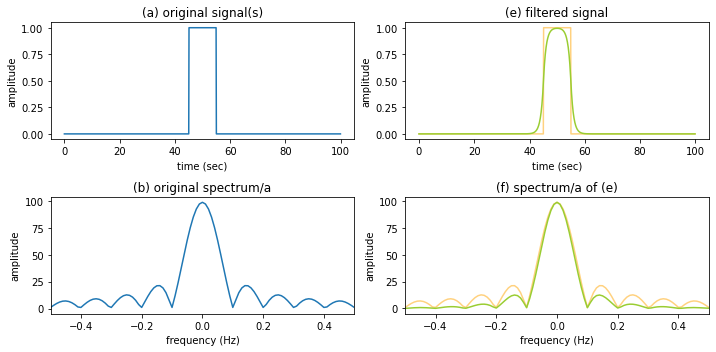

In [20]:
s = TP04_sub.signal_generator(stype='boxcar_ctd',N_bxc=100,slen=1000)

b1 = 0.90 # between 0 and 1

plt.close()
TP04_sub.make_plts_recursion(s,a0=1-b1,b1=b1,npass=2)

**Theoretical background** 

A better performance in the frequency domain can be obtained using a so-called *Chebyshev* filter.
It has a faster roll-off (sharp: good) by allowing ripples (bad) in the frequency response.
They perform very fast. 0\% ripple is called maximally flat or *Butterworth* filter.
You can *design* such a filter (its response) by choosing these four parameters:
- high-pass or low-pass response;
- cutoff frequency;
- percent ripple in pass band
- number of poles.

(Just what is a pole?
The zeros of the system are roots of the numerator polynomial.
The poles of the system are roots of the denominator polynomial. This will make sense in just a minute.)

The task is to find optimal coefficients $a_i$, $b_i$ that are related to these specifications!

In principle, the impulse or frequency response can be of nearly any shape or form.
Many systems studied in science and engineering are described by differential equations, 
and the two responses cannot be arbitrary, 
but must be consistent with solution of these differential equations.
This means the impulse/frequency response can only consist of exponentials and sinusoids 
(solutions to differential equations that govern e.g. electric circuits, wave propagation, heat flow, etc),
because they behave so well when differentiated (lucky us!).

The Laplace transform (LT) is a technique for analyzing such systems for continuous signals (just like the Fourier transform, and like all transforms, it changes one signal in the time domain into a signal in the s-domain; the FT is a subset of the more elaborate LT). The z-transform is used in the discrete case (relation between LT and z-transform is not covered here). The complex z-variable is defined in polar notation as:

\begin{equation}
z = re^{-i\omega}
\end{equation}

a function of two real variables $r$ and $\omega$, and $i=\sqrt{-1}$.
In the z-domain, $\omega$ denotes angular frequency, and $r$ is `some distance'.
(Roughly speaking, it is linked to the exponential signals used in the LT. 
For a filter to be stable, the poles must be inside the z-plane unit-circle, $r=1$.)
This is used in the standard form of the z-transform: 

\begin{equation}
 X(z) = \sum_{n=-\infty}^\infty x_nz^{-n}.
\end{equation}

This definition helps to convert the recursion coefficients into the z-domain *transfer function*, and back again.

**How do we find these coefficients?**

Consider that recursion equation implies a (mathematical) relationship between an input function $x_n$ and an output function $y_n$ of system that must be continually satisfied---the transfer function $H(z)$ 

\begin{equation}
 H(z) = \frac{Y(z)}{X(z)}=\frac{a_0+a_1z^{-1}+a_2z^{-2}+\ldots}{1-b_1z^{-1}-b_2z^{-2}-\ldots}
\end{equation}

This transfer function can be expressed as with poles ($p_n$) and zeros ($z_n$) after factorization:

\begin{equation}
 H(z) = \frac{(z-z_1)(z-z_2)(z-z_3)\ldots}{(z-p_1)(z-p_2)(z-p_3)\dots}
\end{equation}

This last equation is usually the place where digital filter design starts with the pole-zero locations in a so-called *polar plot*. Then the recursion coefficients are computed, and the filter is applied using the recursion equation.

## 4. Use built-in digital filters: Butterworth

Programs to compute the coefficients are generally black boxes. If signal processing is not going to be at the center of your career, you will most likely just use the coefficients provided by programs/functions such as scipy or Matlab's ``butter()`` in combination with ``lfilter()`` and ``filtfilt()`` routines.

To get an idea how they are used,

consider the implementation of a butterworth filtering in the cell below.

 It will generate a figure with three subplots:
 - (a) The signal (blue) and the filtered signal (orange), 
 - (b) $\delta$-pulse and filtered $\delta$-pulse (red)
 - (c) frequency domain with corresponding colors.

 You can change:
 - the two corner (cut-off) frequencies `f1` and `f2` of a band-pass butterworth filter (here $>$0 and $<$0.5),
 - the number of poles `npoles`
 - and the number of passes `npass` (again either 1 or 2).
 
 We here use the function `butter` from scipy.signal package. `lfilter` and `filtfilt` are also built-in function from the same package (online documentation if needed).
(Note that the $a$ and $b$ coefficients are changed between denominator and numerator compared to our notation.)
 
 This exercise uses a 1-Hz sampled record of the 2011 M9.0 Tohoku earthquake recorded by a station in the Massif Central.
1. Start with `npass=1`,`npole=2`, `f1=0.01` and `f2=0.02`, which are corners corresponding to periods of 50s and 100s (i.e., we are looking at waves in that period range---very long periods, indeed) $\square$. What is the effect on the seismogram, what, if the frequency range of the pass band is changed?
     
          The output signal is closer to the input signal as less frequencies have been filtered out. The range of accepted filters by the filter is larger.


2. What changes if you increase `npoles` in all three subplots $\square$?

       The frequency response central peak is narrower. The amplitude drops to 0 faster (at a lower frequency).
       On the seismogram, although it is not very significant, we can see that the amplitudes of the frequencies outside               the (f1 to f2) range which represents the band-pass is lower as compared to the amplitudes at the same frequencies               when using a lower number of npoles.
3. Zoom into that arrival around 800s (for `f1=0.01`and `f2=0.02`): What happens if you change `npass` from 1 to 2 $\square$?
          
       From the code, sp.lfilter is used to perform one pass of the filter on the original signal. 
       sp.filtfilt makes the filter perform two passes on the original signal. This causes the filtered signal to be closer to the original signal's arrival time.
       


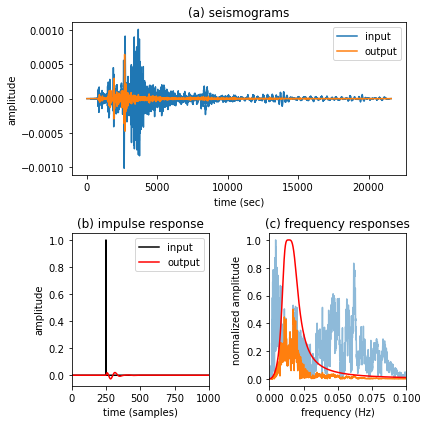

In [19]:
# load a seismogram and define both time and freq vector
data = TP04_sub.read_matv73('TP04_G_SSB_00_LHZ.mat')['data']
time = np.arange(len(data))
freq = np.fft.fftshift(np.fft.fftfreq(len(data)))
fs   = 1.

# define a dirac pulse to compute the impulse response, and the corresponding freq vector
dirac = TP04_sub.signal_generator(stype='dirac',delay=250,slen=signal_length)
freq2 = np.fft.fftshift(np.fft.fftfreq(len(dirac)))

# filter properties and definition
npass = 1
npole = 2
f1    = 0.01
f2    = 0.02
b, a = sp.butter(npole,(2*f1/fs,2*f2/fs),'bandpass',analog=False,output='ba')

# compute filtered signals
if npass==1:
    data_filt = sp.lfilter(b, a, data)
    dirac_filt = sp.lfilter(b, a, dirac)
elif npass==2:
    data_filt = sp.filtfilt(b, a, data)
    dirac_filt = sp.filtfilt(b, a, dirac)

# make plots
plt.close()
TP04_sub.make_plts_butter(time,data,data_filt,dirac,dirac_filt,freq,freq2)

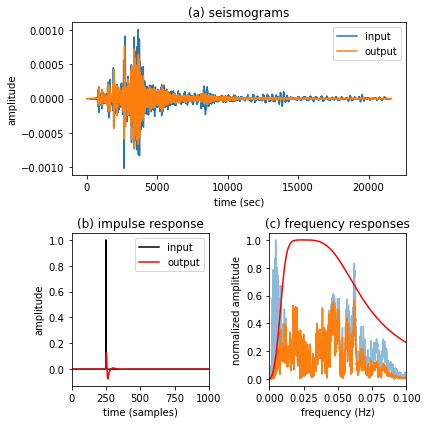

In [20]:
# load a seismogram and define both time and freq vector
#Changing the frequency range 
data = TP04_sub.read_matv73('TP04_G_SSB_00_LHZ.mat')['data']
time = np.arange(len(data))
freq = np.fft.fftshift(np.fft.fftfreq(len(data)))
fs   = 1.

# define a dirac pulse to compute the impulse response, and the corresponding freq vector
dirac = TP04_sub.signal_generator(stype='dirac',delay=250,slen=signal_length)
freq2 = np.fft.fftshift(np.fft.fftfreq(len(dirac)))

# filter properties and definition
npass = 1
npole = 2
f1    = 0.01
f2    = 0.06
b, a = sp.butter(npole,(2*f1/fs,2*f2/fs),'bandpass',analog=False,output='ba')

# compute filtered signals
if npass==1:
    data_filt = sp.lfilter(b, a, data)
    dirac_filt = sp.lfilter(b, a, dirac)
elif npass==2:
    data_filt = sp.filtfilt(b, a, data)
    dirac_filt = sp.filtfilt(b, a, dirac)

# make plots
plt.close()
TP04_sub.make_plts_butter(time,data,data_filt,dirac,dirac_filt,freq,freq2)

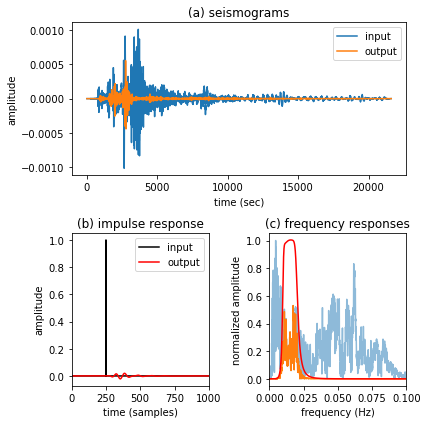

In [21]:
# load a seismogram and define both time and freq vector
#Increasing Npole value
data = TP04_sub.read_matv73('TP04_G_SSB_00_LHZ.mat')['data']
time = np.arange(len(data))
freq = np.fft.fftshift(np.fft.fftfreq(len(data)))
fs   = 1.

# define a dirac pulse to compute the impulse response, and the corresponding freq vector
dirac = TP04_sub.signal_generator(stype='dirac',delay=250,slen=signal_length)
freq2 = np.fft.fftshift(np.fft.fftfreq(len(dirac)))

# filter properties and definition
npass = 1
npole = 5
f1    = 0.01
f2    = 0.02
b, a = sp.butter(npole,(2*f1/fs,2*f2/fs),'bandpass',analog=False,output='ba')

# compute filtered signals
if npass==1:
    data_filt = sp.lfilter(b, a, data)
    dirac_filt = sp.lfilter(b, a, dirac)
elif npass==2:
    data_filt = sp.filtfilt(b, a, data)
    dirac_filt = sp.filtfilt(b, a, dirac)

# make plots
plt.close()
TP04_sub.make_plts_butter(time,data,data_filt,dirac,dirac_filt,freq,freq2)

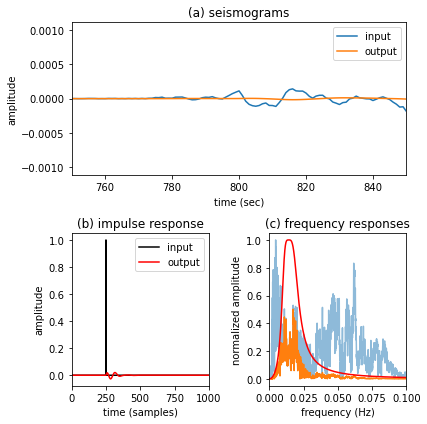

In [22]:
# load a seismogram and define both time and freq vector
data = TP04_sub.read_matv73('TP04_G_SSB_00_LHZ.mat')['data']
time = np.arange(len(data))
freq = np.fft.fftshift(np.fft.fftfreq(len(data)))
fs   = 1.

# define a dirac pulse to compute the impulse response, and the corresponding freq vector
dirac = TP04_sub.signal_generator(stype='dirac',delay=250,slen=signal_length)
freq2 = np.fft.fftshift(np.fft.fftfreq(len(dirac)))

# filter properties and definition
npass = 1
npole = 2
f1    = 0.01
f2    = 0.02
b, a = sp.butter(npole,(2*f1/fs,2*f2/fs),'bandpass',analog=False,output='ba')

# compute filtered signals
if npass==1:
    data_filt = sp.lfilter(b, a, data)
    dirac_filt = sp.lfilter(b, a, dirac)
elif npass==2:
    data_filt = sp.filtfilt(b, a, data)
    dirac_filt = sp.filtfilt(b, a, dirac)

# make plots
plt.close()
TP04_sub.make_plts_butter(time,data,data_filt,dirac,dirac_filt,freq,freq2,750,850)
plt.show()

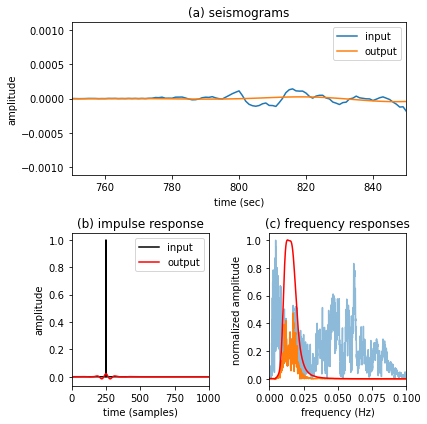

In [23]:
# load a seismogram and define both time and freq vector
data = TP04_sub.read_matv73('TP04_G_SSB_00_LHZ.mat')['data']
time = np.arange(len(data))
freq = np.fft.fftshift(np.fft.fftfreq(len(data)))
fs   = 1.

# define a dirac pulse to compute the impulse response, and the corresponding freq vector
dirac = TP04_sub.signal_generator(stype='dirac',delay=250,slen=signal_length)
freq2 = np.fft.fftshift(np.fft.fftfreq(len(dirac)))

# filter properties and definition
npass = 2
npole = 2
f1    = 0.01
f2    = 0.02
b, a = sp.butter(npole,(2*f1/fs,2*f2/fs),'bandpass',analog=False,output='ba')

# compute filtered signals
if npass==1:
    data_filt = sp.lfilter(b, a, data)
    dirac_filt = sp.lfilter(b, a, dirac)
elif npass==2:
    data_filt = sp.filtfilt(b, a, data)
    dirac_filt = sp.filtfilt(b, a, dirac)

# make plots
plt.close()
TP04_sub.make_plts_butter(time,data,data_filt,dirac,dirac_filt,freq,freq2,750,850)
plt.show()